In [21]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
def format_with_commas(x):
    return '{:,.3f}'.format(x)

column_nbrcases = 'Nbr. Cases in Pop.'
column_percentcases = 'Percent Prevalence'

pd.options.display.float_format = format_with_commas

ihme_gbd_population_path = 'Resources\Global_Burden_of_Disease\IHME_GBD_2019_POP_2000_2019_0\GBD_Population_Data_2000_2019.csv'
imhe_gbd_depression_path = 'Resources\Global_Burden_of_Disease\IHME_GBD_2019_DEPRESSION_2000_2019_0\GBD_Depression_Data_2000_2019.csv'

ihme_gbd_population = pd.read_csv(ihme_gbd_population_path)
imhe_gbd_depression = pd.read_csv(imhe_gbd_depression_path)

merged_data = pd.merge(ihme_gbd_population, imhe_gbd_depression, on=["Location","Year"], how="inner")
clean_merged_data = merged_data.drop(columns=['Gender_y', 'Age Group_y']) \
                               .rename(columns={'Gender_x': 'Gender', 'Age Group_x': 'Age Group', 'Location':'WHO Country Name'})

desired_column_order = ['WHO Country Name', 'Year', 'Age Group', 'Gender', 'Disorder', 'Population', 'Nbr. Cases in Pop.']
reordered_data = clean_merged_data.loc[:, desired_column_order].copy()

reordered_data.loc[:, 'Percent Prevalence'] = ((reordered_data['Nbr. Cases in Pop.'] / reordered_data['Population']) * 100).round(2)
reordered_data_sorted = reordered_data.sort_values(by='WHO Country Name')

output_csv_path ="Resources/Global_Burden_of_Disease/Population_Vs_Depression.csv"
reordered_data.to_csv(output_csv_path, index=False)

reordered_data


,WHO Country Name,Year,Age Group,Gender,Disorder,Population,Nbr. Cases in Pop.,Percent Prevalence
0,Global,2000,All Ages,both,Depressive disorders,"6,155,409,246.189","211,235,856.600",3.430
1,"Southeast Asia, East Asia, and Oceania",2000,All Ages,both,Depressive disorders,"1,901,671,487.109","54,050,769.400",2.840
2,East Asia,2000,All Ages,both,Depressive disorders,"1,346,640,309.522","40,999,902.480",3.040
3,Democratic People's Republic of Korea,2000,All Ages,both,Depressive disorders,"23,907,232.011","668,855.053",2.800
4,Taiwan (Province of China),2000,All Ages,both,Depressive disorders,"22,277,291.129","614,189.935",2.760
...,...,...,...,...,...,...,...,...
10435,Torbay,2019,All Ages,both,Depressive disorders,"132,256.404","6,406.464",4.840
10436,"Bristol, City of",2019,All Ages,both,Depressive disorders,"466,014.256","21,763.659",4.670
10437,Bournemouth,2019,All Ages,both,Depressive disorders,"202,527.410","9,755.302",4.820
10438,Cornwall,2019,All Ages,both,Depressive disorders,"563,492.858","27,434.820",4.870


In [22]:
#Checking for missing values
print(reordered_data.isnull().sum())

WHO Country Name      0
Year                  0
Age Group             0
Gender                0
Disorder              0
Population            0
Nbr. Cases in Pop.    0
Percent Prevalence    0
dtype: int64


In [23]:
#Counting the number of unique locations in the data
unique_locations = reordered_data['WHO Country Name'].unique()
print(len(unique_locations))

513


In [24]:
# Identify the outliers in the data
nbrcases_data = reordered_data['Nbr. Cases in Pop.']

quartiles = nbrcases_data.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5 * iqr)
upper_bound = upper_quartile + (1.5 * iqr)

outliers = nbrcases_data[(nbrcases_data < lower_bound) | (nbrcases_data > upper_bound)]

print("Potential outliers for Population:")
print(len(outliers))

Potential outliers for Population:
1807


In [25]:
# Remove outliers
nbrcases_data_no_outliers = nbrcases_data[(nbrcases_data >= lower_bound) & (nbrcases_data <= upper_bound)]

data_no_outliers = reordered_data.loc[nbrcases_data_no_outliers.index]

print("Number of outliers removed for Number of Cases:")
print(len(nbrcases_data) - len(nbrcases_data_no_outliers))

data_no_outliers


Number of outliers removed for Number of Cases:
1807


,WHO Country Name,Year,Age Group,Gender,Disorder,Population,Nbr. Cases in Pop.,Percent Prevalence
4,Taiwan (Province of China),2000,All Ages,both,Depressive disorders,"22,277,291.129","614,189.935",2.760
6,Lao People's Democratic Republic,2000,All Ages,both,Depressive disorders,"5,357,580.925","115,261.820",2.150
8,Oceania,2000,All Ages,both,Depressive disorders,"8,349,579.180","210,466.009",2.520
9,Solomon Islands,2000,All Ages,both,Depressive disorders,"449,091.641","10,442.784",2.330
12,Georgia,2000,All Ages,both,Depressive disorders,"4,729,658.663","174,815.612",3.700
...,...,...,...,...,...,...,...,...
10435,Torbay,2019,All Ages,both,Depressive disorders,"132,256.404","6,406.464",4.840
10436,"Bristol, City of",2019,All Ages,both,Depressive disorders,"466,014.256","21,763.659",4.670
10437,Bournemouth,2019,All Ages,both,Depressive disorders,"202,527.410","9,755.302",4.820
10438,Cornwall,2019,All Ages,both,Depressive disorders,"563,492.858","27,434.820",4.870


In [26]:
#Data Exploration - Basic Statistics and Skewness

nbrcases_mean = data_no_outliers[column_nbrcases].mean()
nbrcases_median = data_no_outliers[column_nbrcases].median()
nbrcases_mode = data_no_outliers[column_nbrcases].value_counts().idxmax()
nbrcases_skewness = data_no_outliers[column_nbrcases].skew()
nbrcases_min = data_no_outliers[column_nbrcases].min()  
nbrcases_max = data_no_outliers[column_nbrcases].max()  

percentcases_mean = data_no_outliers[column_percentcases].mean()
percentcases_median = data_no_outliers[column_percentcases].median()
percentcases_mode = data_no_outliers[column_percentcases].value_counts().idxmax()
percentcases_skewness = data_no_outliers[column_percentcases].skew()
percentcases_min = data_no_outliers[column_percentcases].min()
percentcases_max = data_no_outliers[column_percentcases].max()  

summary_dict = {
    "Number Cases": {
        "Mean": nbrcases_mean,
        "Median": nbrcases_median,
        "Mode": nbrcases_mode,
        "Min": nbrcases_min,
        "Max": nbrcases_max,
        "Skewness": nbrcases_skewness
        
    },
    "Percent Cases": {
        "Mean": percentcases_mean,
        "Median": percentcases_median,
        "Mode": percentcases_mode,
        "Min": percentcases_min,
        "Max": percentcases_max,
        "Skewness": percentcases_skewness
        
    }
}

summary_df = pd.DataFrame(summary_dict)
summary_df.round(2)

,Number Cases,Percent Cases
Mean,"85,060.730",3.920
Median,"32,484.440",4.300
Mode,"152,882.310",4.610
Min,34.130,1.400
Max,"620,606.620",14.030
Skewness,2.140,0.590


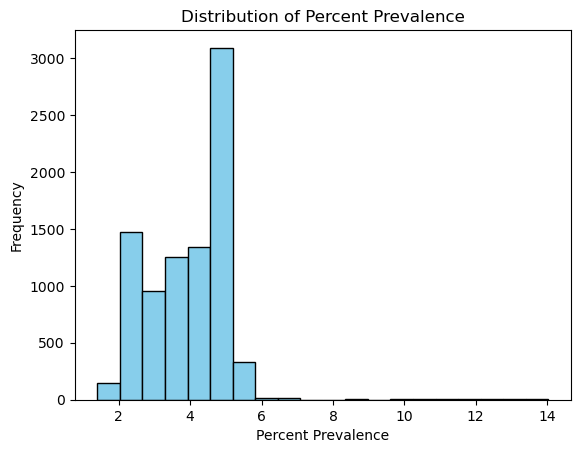

In [27]:
# Create a histogram to visualize the distribution of 'Percent Prevalence'
plt.hist(data_no_outliers['Percent Prevalence'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Percent Prevalence')
plt.ylabel('Frequency')
plt.title('Distribution of Percent Prevalence')

# Show the plot
plt.show()

In [28]:
#Average Cases by Location Per Year
avg_cases_byregion_year = data_no_outliers.groupby(["WHO Country Name", "Year"])[column_nbrcases].mean().round(2)
avg_percent_byregion_year = data_no_outliers.groupby(["WHO Country Name", "Year"])[column_percentcases].mean().round(2)


avgdepression_summary_by_regionyear = pd.DataFrame({
    "Average Number of Cases": avg_cases_byregion_year,
    "Average Percent of Prevalence": avg_percent_byregion_year,
})

avgdepression_summary_by_regionyear

Average Number of Cases  Average Percent of Prevalence
WHO Country Name Year                                                        
Aceh             2000               83,951.210                          2.020
                 2001               85,819.420                          2.040
                 2002               87,668.890                          2.050
                 2003               89,470.910                          2.070
                 2004               89,333.930                          2.070
...                                        ...                            ...
Ōsaka            2015              225,394.580                          2.510
                 2016              225,530.510                          2.510
                 2017              225,852.000                          2.520
                 2018              226,036.650                          2.530
                 2019              226,155.940                          2.530

[8573 rows x 2 columns]

In [29]:
#Highest Percent Prevalence by Country/Year
top_depression_location = avgdepression_summary_by_regionyear.sort_values(by='Average Number of Cases', ascending=False)
top_depression_location.head(5)

Average Number of Cases  \
WHO Country Name     Year                            
Rio de Janeiro       2009              620,606.620   
Burkina Faso         2015              620,452.850   
Rio de Janeiro       2010              620,450.080   
                     2001              619,985.420   
Syrian Arab Republic 2013              617,922.420   

                           Average Percent of Prevalence  
WHO Country Name     Year                                 
Rio de Janeiro       2009                          3.820  
Burkina Faso         2015                          3.110  
Rio de Janeiro       2010                          3.780  
                     2001                          4.180  
Syrian Arab Republic 2013                          3.650